# Cluster similar books together for suggestions

Based on the dataset created from the book catalog of the site audiocite.net

## Import basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load and explore the dataset

In [2]:
df = pd.read_csv("./books-data.csv", 
                 names=["id", "author", "genre", "duration", "downloads", "reader", 
                        "tag01", "tag02", "tag03", "tag04", "tag05", "tag06", "tag07", "tag08", "tag09", "tag10", 
                        "tag11", "tag12", "tag13", "tag14", "tag15", "tag16", "tag17", "tag18", "tag19", "tag20", 
                        "tag21", "tag22", "tag23", "tag24", "tag25", "tag26", "tag27", "tag28", "tag29", "tag30", 
                        "tag31", "tag32", "tag33", "tag34", "tag35", "tag36", "tag37", "tag38", "tag39", "tag40", 
                        "tag41", "tag42", "tag43", "tag44", "tag45", "tag46", "tag47", "tag48", "tag49", "tag50" ])

In [3]:
df.shape

(3652, 56)

In [4]:
df.head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50
0,23,1,R,139,77515,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,2,C,60,6901,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,3,R,88,22623,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,66,4,C,40,24285,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,5,D,28,11687,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50
3647,5042,138,D,148,0,39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3648,5043,833,N,13,0,147,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3649,5044,140,N,65,0,147,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3650,5045,673,N,28,0,147,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3651,5046,586,C,13,0,147,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Definition of features

| Feature  | Description | Comments |
|--------------|-------------|--------|
| id | Book ID | |
| author | Encoded book author | All unique authors are converted to unique numbers |
| genre | The genre | 'R' for 'Romain' etc. |
| duration | Duration in full minutes | |
| downloads | Number of downloads | |
| reader | Encoded reader | All unique readers are converted to unique numbers |
| tagN | If the tag is present | All tags are encoded using numbers |

## Mold the data

Change genre from string to float

In [6]:
genre_map = {'AN': 1.0, 'JN': 2.0, 'E': 3.0, 'C': 4.0, 'CS': 5.0, 'D': 6.0, 'F': 7.0, 'H': 8.0, 'N': 9.0, 'PH': 10.0, 'PA': 11.0, 'P': 12.0, 'RL': 13.0, 'R': 14.0, 'SF': 15.0, 'TH': 16.0}
df['genre'] = df['genre'].map(genre_map)

In [7]:
df.head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50
0,23,1,14.0,139,77515,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,2,4.0,60,6901,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,3,14.0,88,22623,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,66,4,4.0,40,24285,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,5,6.0,28,11687,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Verify that all the data is numeric

In [8]:
df.applymap(lambda x: isinstance(x, (int, float))).head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


## Check for correlated features

Correlated features don't add any information, since they are expressing the same data in different ways.

In [9]:
def plot_correlation(df, size = 12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

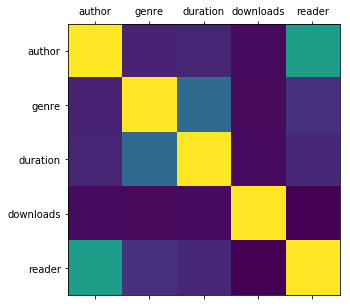

In [10]:
plot_correlation(df.loc[:, 'author':'reader'], 5)

## Scale features

### Check for outliers

If there is no outliers, we could use Max-Min Scaling

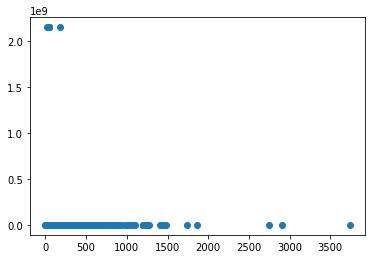

In [11]:
x = df.duration
y = df.downloads

plt.scatter(x, y)
plt.show()

We are going to use Z-Score Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

df_ss = StandardScaler().fit_transform(df.loc[:, 'duration':'downloads'])

C:\Users\Artem\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Artem\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
df_ss = pd.DataFrame(df_ss)
df_ss.columns = ['duration', 'downloads']

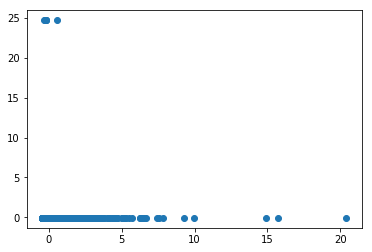

In [14]:
x = df_ss.duration
y = df_ss.downloads

plt.scatter(x, y)
plt.show()

In [15]:
df_scaled = pd.concat([df.loc[:, 'id':'genre'], df_ss], axis = 1)
df_scaled = pd.concat([df_scaled, df.loc[:, 'reader':'tag50']], axis = 1)

In [16]:
df_scaled.head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag41,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50
0,23,1,14.0,0.318616,-0.039780,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,2,4.0,-0.122403,-0.040592,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,3,14.0,0.033908,-0.040411,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,66,4,4.0,-0.234053,-0.040392,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,5,6.0,-0.301043,-0.040537,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apply KMeans

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(df_scaled.loc[:, 'author' : 'tag50'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
df_scaled.loc[:,'label'] = kmeans.labels_

In [19]:
df_scaled.head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag42,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50,label
0,23,1,14.0,0.318616,-0.039780,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,24,2,4.0,-0.122403,-0.040592,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,61,3,14.0,0.033908,-0.040411,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,66,4,4.0,-0.234053,-0.040392,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,67,5,6.0,-0.301043,-0.040537,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


Text(0.5, 0, 'duration')

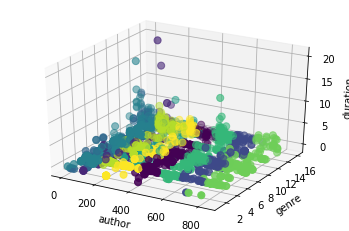

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled.loc[:, 'author'], df_scaled.loc[:, 'genre'], df_scaled.loc[:, 'duration'], c=df_scaled.loc[:,'label'], s=50, cmap='viridis')
ax.set_xlabel('author')
ax.set_ylabel('genre')
ax.set_zlabel('duration')

### Print groups

In [21]:
groups = df_scaled.groupby('label')
groups['id'].apply(lambda ids: [id for id in ids])

label
0    [2680, 2681, 2684, 2686, 2713, 2735, 2737, 273...
1    [527, 552, 553, 554, 556, 564, 565, 573, 576, ...
2    [4066, 4070, 4073, 4075, 4088, 4090, 4093, 410...
3    [23, 24, 61, 66, 67, 68, 70, 72, 74, 77, 78, 7...
4    [1058, 1059, 1195, 1258, 1430, 1441, 1483, 149...
5    [1540, 1555, 1561, 1562, 1575, 1581, 1589, 159...
6    [3444, 3447, 3448, 3471, 3475, 3476, 3489, 349...
7    [4526, 4538, 4539, 4541, 4543, 4544, 4546, 454...
8    [1967, 1976, 1981, 2058, 2258, 2291, 2293, 230...
9    [1733, 1762, 1853, 1863, 1882, 1908, 1936, 194...
Name: id, dtype: object

### Fails because we have categorical data - groups authors with sequential ids together

## Apply K-prototype

In [22]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=10, init='Cao', verbose=1)
clusters = kproto.fit_predict(df_scaled.loc[:, 'author' : 'tag50'], categorical=[0, 1, 4])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1214, ncost: 7764.120300752722
Run: 1, iteration: 2/100, moves: 632, ncost: 7471.654606972088
Run: 1, iteration: 3/100, moves: 281, ncost: 7297.8603824808615
Run: 1, iteration: 4/100, moves: 217, ncost: 7175.290835403544
Run: 1, iteration: 5/100, moves: 284, ncost: 6977.71764774732
Run: 1, iteration: 6/100, moves: 40, ncost: 6973.645219390838
Run: 1, iteration: 7/100, moves: 10, ncost: 6973.268251988983
Run: 1, iteration: 8/100, moves: 0, ncost: 6973.268251988983
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1471, ncost: 7514.837981874812
Run: 2, iteration: 2/100, moves: 153, ncost: 7493.317619568028
Run: 2, iteration: 3/100, moves: 42, ncost: 7483.931340852258
Run: 2, iteration: 4/100, moves: 56, ncost: 7448.974578185675
Run: 2, iteration: 5/100, moves: 72, ncost: 7376.638793585893
Run: 2, iteration: 6/100, 

Run: 10, iteration: 3/100, moves: 136, ncost: 7120.2846521044
Run: 10, iteration: 4/100, moves: 57, ncost: 7105.259378480085
Run: 10, iteration: 5/100, moves: 20, ncost: 7101.4551523210175
Run: 10, iteration: 6/100, moves: 9, ncost: 7087.987959891165
Run: 10, iteration: 7/100, moves: 13, ncost: 7074.970325227694
Run: 10, iteration: 8/100, moves: 9, ncost: 7068.070154542804
Run: 10, iteration: 9/100, moves: 5, ncost: 7066.360110544395
Run: 10, iteration: 10/100, moves: 7, ncost: 7065.3900229570545
Run: 10, iteration: 11/100, moves: 6, ncost: 7064.6629828255045
Run: 10, iteration: 12/100, moves: 3, ncost: 7064.54992206147
Run: 10, iteration: 13/100, moves: 0, ncost: 7064.54992206147
Best run was number 8


In [23]:
df_scaled.loc[:,'label1'] = clusters

In [24]:
df_scaled.head(5)

,id,author,genre,duration,downloads,reader,tag01,tag02,tag03,tag04,...,tag43,tag44,tag45,tag46,tag47,tag48,tag49,tag50,label,label1
0,23,1,14.0,0.318616,-0.039780,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,4
1,24,2,4.0,-0.122403,-0.040592,2,1,0,0,0,...,0,0,0,0,0,0,0,0,3,8
2,61,3,14.0,0.033908,-0.040411,1,1,0,1,0,...,0,0,0,0,0,0,0,0,3,2
3,66,4,4.0,-0.234053,-0.040392,2,1,0,0,0,...,0,0,0,0,0,0,0,0,3,8
4,67,5,6.0,-0.301043,-0.040537,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,8


Text(0.5, 0, 'duration')

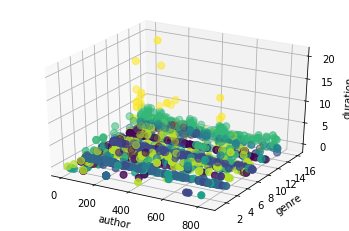

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled.loc[:, 'author'], df_scaled.loc[:, 'genre'], df_scaled.loc[:, 'duration'], c=df_scaled.loc[:,'label1'], s=50, cmap='viridis')
ax.set_xlabel('author')
ax.set_ylabel('genre')
ax.set_zlabel('duration')

### Print groups

In [27]:
groups = df_scaled.groupby('label1')
booksingrups = groups['id'].apply(lambda ids: [id for id in ids])
booksingrups

label1
0    [80, 81, 82, 83, 84, 85, 91, 163, 165, 205, 20...
1    [168, 173, 177, 181, 185, 191, 192, 196, 199, ...
2    [61, 68, 74, 94, 147, 171, 178, 179, 183, 237,...
3    [70, 140, 158, 169, 174, 234, 241, 254, 258, 2...
4    [23, 79, 106, 231, 317, 336, 412, 469, 530, 53...
5    [98, 99, 101, 102, 103, 110, 112, 113, 114, 11...
6    [78, 86, 229, 246, 282, 300, 304, 363, 448, 47...
7                 [1885, 2339, 2460, 2467, 2483, 2515]
8    [24, 66, 67, 72, 77, 87, 90, 92, 167, 170, 222...
9    [516, 538, 787, 810, 922, 1057, 1284, 1382, 15...
Name: id, dtype: object

## Save results to file

In [31]:
# booksingrups.to_csv('clusters.out')